In [189]:
def apply_discounts(products, stocks):
    """
    Напишите функцию apply_discounts(), которая снижает цену продуктов в словаре products на указанный в словаре stocks процент. 
    Функция должна вернуть результирующий словарь, ключи которого — товары, а значения — новые цены.
    Если продукта из словаря stocks нет в словаре products, то его необходимо пропустить. Цены округлите до второго знака после запятой.
    """
    for key in stocks:
        #print(float(stocks[key].replace('%',''))/100)
        products.update({key:round((products[key] * (1-float(stocks[key].replace('%',''))/100)),2)})
        
    return (products)
    
    
if __name__ == '__main__':
    products={
        "Oranges (packaged)": 114.99, 
        "Candy (Rotfront)": 280.00,
        "Boiled sausage": 199.99,
        "Juice J7 (orange)": 119.99,
        "Trout (Seven Seas)": 399.99
        }
    stocks = {
        "Boiled sausage": "33%",
        "Juice J7 (orange)": "12%",
        "Trout (Seven Seas)": "18%"
    }
    new_products = apply_discounts(products, stocks)
    print(new_products)

{'Oranges (packaged)': 114.99, 'Candy (Rotfront)': 280.0, 'Boiled sausage': 133.99, 'Juice J7 (orange)': 105.59, 'Trout (Seven Seas)': 327.99}


In [190]:
import pandas as pd   
bronze_top = pd.read_csv('bronze_top.csv')
silver_top = pd.read_csv('silver_top.csv')
merged = bronze_top.merge(
    silver_top,
    on='Country',
    suffixes=('_bronze', '_silver')
)
display(bronze_top)
display(silver_top)
display(merged)


,Country,Total
0,United States,1052.0
1,Soviet Union,584.0
2,United Kingdom,505.0
3,France,475.0
4,Germany,454.0


,Country,Total
0,United States,1195.0
1,Soviet Union,627.0
2,United Kingdom,591.0
3,France,461.0
4,Italy,394.0


,Country,Total_bronze,Total_silver
0,United States,1052.0,1195.0
1,Soviet Union,584.0,627.0
2,United Kingdom,505.0,591.0
3,France,475.0,461.0


In [191]:
solar_data = pd.read_csv('solarpower.csv')
solar_data[solar_data['cum_power'] == -1]
display(solar_data['cum_power'].shape[0])
for i in range(664):
    if solar_data['cum_power'].iloc[i] == -1:
        print ((i,(solar_data['cum_power'].iloc[i-1] + solar_data['cum_power'].iloc[i+1])/2))

solar_data['cum_power'].iloc[45] = 20255  
solar_data['cum_power'].iloc[647] = 27998


664

(45, 20255.0)
(647, 27998.0)


C:\Users\AubakirovMA\AppData\Local\Temp\ipykernel_8608\2197976246.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\AubakirovMA\AppData\Local\Temp\ipykernel_8608\2197976246.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [155]:
solar_data['date'] = pd.to_datetime(solar_data['date'], dayfirst=False)
solar_data

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0
...,...,...
659,2018-10-22,28101.0
660,2018-10-23,28109.0
661,2018-10-24,28115.0
662,2018-10-25,28117.0


In [180]:
solar_data['month'] = solar_data['date'].dt.to_period('M')
solar_data['day_power'] = solar_data['cum_power'].diff()
plot_data = solar_data.groupby(by='month')['day_power'].mean().round()
plot_data


month
2017-01     3.0
2017-02     4.0
2017-03    11.0
2017-04    16.0
2017-05    19.0
2017-06    22.0
2017-07    18.0
2017-08    15.0
2017-09    12.0
2017-10     6.0
2017-11     3.0
2017-12     1.0
2018-01     2.0
2018-02     7.0
2018-03     9.0
2018-04    15.0
2018-05    21.0
2018-06    19.0
2018-07    22.0
2018-08    17.0
2018-09    14.0
2018-10     9.0
Freq: M, Name: day_power, dtype: float64

In [187]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
px.line(
    data_frame=solar_data,
    x=solar_data['date'],
    y=solar_data['day_power']
)

In [74]:
from operator import concat
import numpy as np
import seaborn as sns
import pandas as pd

np.random.seed(123)

a = np.random.random(100000)
b = np.random.random(100000)

df_1 = pd.DataFrame(a, columns=['a'])
df_2 = pd.DataFrame(b, columns=['b'])

df = pd.concat([df_1, df_2],axis=1)

df.corr()

,a,b
a,1.00000,0.00603
b,0.00603,1.00000


# Доверительные интеравлы

In [13]:
def interval (n, x_mean, sigma, gamma):
    """_доверительный интервал (зная стандартное отклонение)_

    Args:
        n (_int_): _размер выборки_
        x_mean (_float_): _выборочное среднее_
        sigma (_float_): _истинное стандартное отклонение_
        gamma (_float_): _уровень значимости_

    Returns:
        _float_: _доверительный интервал и z-критическое_
    """
    from scipy.stats import norm
    alpha = 1 - gamma
    z_crit = -norm.ppf(alpha/2)
    eps = z_crit * sigma/(n ** 0.5)
    lower_bound = x_mean - eps
    upper_bound = x_mean + eps
    confidence_interval = (round(lower_bound,2), round(upper_bound,2)) 
    return ('Доверительный интервал: {}, z-критическое: {}'.format(confidence_interval, round(z_crit,2)))

interval(64, 12.35, 2.4, 0.9)

'Доверительный интервал: (11.86, 12.84), z-критическое: 1.64'

In [15]:
def interval (n, x_mean, x_std, gamma):
    """_доверительный интервал (НЕ зная стандартное отклонение)_

    Args:
        n (_int_): _размер выборки_
        x_mean (_float_): _выборочное среднее_
        x_std (_float_): _выборочное стандартное отклонение_
        gamma (_float_): _уровень значимости_

    Returns:
        _float_: _доверительный интервал и z-критическое_
    """
    from scipy.stats import t
    alpha = 1 - gamma
    k = n - 1 #число степеней свободы
    t_crit = -t.ppf(alpha/2, k)
    eps = t_crit * x_std/(n ** 0.5)
    lower_bound = x_mean - eps
    upper_bound = x_mean + eps
    confidence_interval = (round(lower_bound,2), round(upper_bound,2)) 
    return ('Доверительный интервал: {}, z-критическое: {}'.format(confidence_interval, round(t_crit,2)))

interval(15, 2000, 400, 0.95)

'Доверительный интервал: (1778.49, 2221.51), z-критическое: 2.14'

In [17]:
def proportions_conf_interval(n, x_p, gamma=0.95):
    """_доверительный интервал для пропорции_

    Args:
        n (_int_): _размер выборки_
        x_p (_float_): _выборочная пропорция_
        gamma (_float_): _уровень значимости_

    Returns:
        _float_: _доверительный интервал_
    """ 
    from scipy.stats import norm    
    alpha = 1 - gamma # уровень значимости
    z_crit = -norm.ppf(alpha/2) # z критическое
    eps = z_crit * (x_p * (1 - x_p) / n) ** 0.5 #погрешность
    lower_bound = x_p - eps # левая (нижняя) граница
    upper_bound = x_p + eps # правая (верхняя) граница
    # возвращаем кортеж из округлённых границ интервала
    return round(lower_bound * 100, 2), round(upper_bound * 100, 2)

In [22]:
def diff_proportions_conf_interval(n, xp, gamma=0.95):
    """_гриницы доверительного интервала разницы конверсий_

    Args:
        n (_list_): _список из размеров выборок_
        xp (_list_): _список из выборочных пропорций_
        gamma (float, optional): _уровень значимости_. Defaults to 0.95.

    Returns:
        _type_: _description_
    """
    from scipy.stats import norm 
    alpha = 1 - gamma # уровень значимости
    diff = xp[1] - xp[0] # выборочная разница конверсий групп B и A
    z_crit = -norm.ppf(alpha/2) # z критическое
    eps = z_crit * (xp[0] * (1 - xp[0])/n[0] + xp[1] * (1 - xp[1])/n[1]) ** 0.5 # погрешность
    lower_bound = diff - eps # левая (нижняя) граница
    upper_bound = diff + eps # правая (верхняя) граница
    # возвращаем кортеж из округлённых границ интервала
    return round(lower_bound *100, 2), round(upper_bound * 100, 2)

In [32]:
diff_proportions_conf_interval([1000, 1000], [0.045, 0.05], 0.95)

(-1.36, 2.36)

In [1]:
import pandas as pd 

In [13]:
df = pd.read_csv('new-site.csv')

C:\Users\AubakirovMA\AppData\Local\Temp\ipykernel_16976\2466677782.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('new-site.csv', sep=' \ ')


In [16]:
df

,site\tdwell-time
0,0\t2
1,1\t48
2,0\t15
3,1\t16
4,0\t38
...,...
295,0\t22
296,0\t7
297,1\t144
298,0\t89


In [20]:
a = '1\t48'
a.split()[0]

'1'

In [30]:
df['site'] = df['site\tdwell-time'].apply(lambda x: int(x.split()[0]))
df['time'] = df['site\tdwell-time'].apply(lambda x: int(x.split()[1]))

In [34]:
df.groupby('site')['time'].mean()

site
0    90.849462
1    88.000000
Name: time, dtype: float64

In [45]:
df[df['site'] == 0]['time']

0        2
2       15
4       38
6      571
8      233
      ... 
294     39
295     22
296      7
298     89
299    138
Name: time, Length: 186, dtype: int64

In [46]:
from scipy.stats import mannwhitneyu

# Выдвигаем гипотезы
H0 = 'Среднее время пребывания в группах А и B равны'
H1 = 'Среднее время пребывания в группе А больше, чем в группе B'

# Задаем уровень значимости
alpha = 0.05


_, p_value = mannwhitneyu(x=df[df['site'] == 0]['time'], y=df[df['site'] == 0]['time'], alternative='greater')

print('p-value', p_value)
if p_value < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value 0.5001923671474854
Принимаем нулевую гипотезу. Среднее время пребывания в группах А и B равны


In [51]:
from scipy.stats import shapiro

H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

# Установим уровень значимости
alpha = 0.05
# Вычисляем статистическую значимость
_, p = shapiro(df)

if p > alpha:
	print(p,H0)
else:
	print(p,Ha)

2.163973605831777e-35 Данные не распределены нормально (мы отвергаем H0)


In [5]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

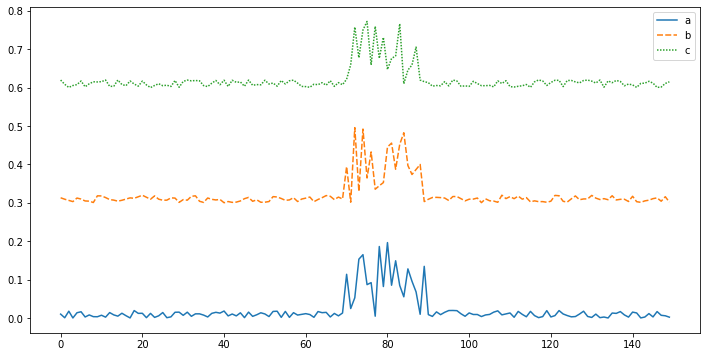

In [58]:
a = np.random.uniform(0, 0.02, 70)
b = np.random.uniform(0, 0.02, 70) + 0.3
c = np.random.uniform(0, 0.02, 70) + 0.6
data = pd.DataFrame({'a':a, 'b':b, 'c':c})

a1 = np.random.uniform(0, 0.2, 20)
b1 = np.random.uniform(0, 0.2, 20) + 0.3
c1 = np.random.uniform(0, 0.2, 20) + 0.6
data1 = pd.DataFrame({'a':a1, 'b':b1, 'c':c1})

a2 = np.random.uniform(0, 0.02, 60)
b2 = np.random.uniform(0, 0.02, 60) + 0.3
c2 = np.random.uniform(0, 0.02, 60) + 0.6
data2 = pd.DataFrame({'a':a2, 'b':b2, 'c':c2})

df = pd.concat([data, data1, data2], ignore_index=True)

fig = plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=df)